In [20]:
import matplotlib.pyplot as plt
from torchvision import transforms
import torch
import cv2
from PIL import Image

cam = cv2.VideoCapture(1)

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_counter += 1

cam.release()

cv2.destroyAllWindows()

Escape hit, closing...


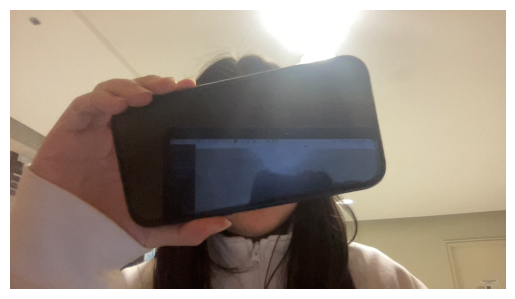

720 1280


/var/folders/3q/hs4bz4md2ng8m_7rpj38p0hr0000gn/T/ipykernel_66714/3788423792.py:23: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_color = mode(reshaped_image, axis=0)


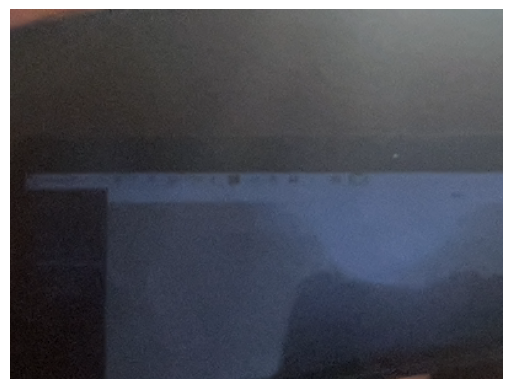

Mode color (RGB): [[[57 62 80]
  [57 62 80]
  [57 62 80]
  ...
  [57 62 80]
  [57 62 80]
  [57 62 80]]

 [[57 62 80]
  [57 62 80]
  [57 62 80]
  ...
  [57 62 80]
  [57 62 80]
  [57 62 80]]

 [[57 62 80]
  [57 62 80]
  [57 62 80]
  ...
  [57 62 80]
  [57 62 80]
  [57 62 80]]

 ...

 [[57 62 80]
  [57 62 80]
  [57 62 80]
  ...
  [57 62 80]
  [57 62 80]
  [57 62 80]]

 [[57 62 80]
  [57 62 80]
  [57 62 80]
  ...
  [57 62 80]
  [57 62 80]
  [57 62 80]]

 [[57 62 80]
  [57 62 80]
  [57 62 80]
  ...
  [57 62 80]
  [57 62 80]
  [57 62 80]]]


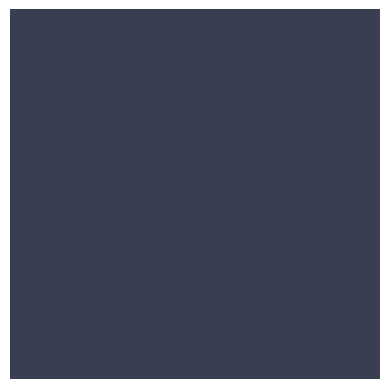

In [56]:
from scipy.stats import mode
import numpy as np

plt.imshow(frame_rgb)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

# Get the shape of the image data
height, width, channels = frame_rgb.shape

print(height,width)
# Define the coordinates of the top-left and bottom-right corners for cropping
top_left = (200, 400)
bottom_right = (500, 800)

# Crop the photo using array slicing
cropped_photo = frame_rgb[top_left[0]:bottom_right[0] + 1, top_left[1]:bottom_right[1] + 1, :]

# Reshape the image to a 2D array (height x width, 3) for mode calculation
reshaped_image = cropped_photo.reshape(-1, 3)

# Calculate the mode color
mode_color = mode(reshaped_image, axis=0)

# The mode color is given as an array of RGB values
mode_color = mode_color.mode[0]

single_color = np.full((100, 100, 3), mode_color, dtype=np.uint8)

plt.imshow(cropped_photo)

plt.axis('off')  # Turn off axis labels and ticks
plt.show()

print("Mode color (RGB):", single_color)
# Display the color using Matplotlib
plt.imshow(single_color)
plt.axis('off')  # Hide the axes
plt.show()

In [33]:
from webcolors import rgb_to_name, CSS3_HEX_TO_NAMES
import webcolors
import numpy as np
from scipy.stats import mode

# Example RGB value
rgb_color = single_color  # An example RGB color

def find_closest_color(rgb_value):
    min_distance = float('inf')
    closest_color = None
    
    for css3_hex, color_name in CSS3_HEX_TO_NAMES.items():
        # Convert CSS3 hex color to RGB
        known_rgb = webcolors.hex_to_rgb(css3_hex)
        
        # Calculate Euclidean distance between the known and target colors
        distance = np.linalg.norm(np.array(known_rgb) - np.array(rgb_value))
        
        if distance < min_distance:
            min_distance = distance
            closest_color = color_name

    return closest_color

try:
    color_name = rgb_to_name(rgb_color)
except ValueError:
    # Color not found in the database, so find the closest color
    color_name = find_closest_color(rgb_color)

print(f"The color is: {color_name}")


The color is: silver


In [81]:
from webcolors import rgb_to_name, CSS3_HEX_TO_NAMES
import webcolors
import numpy as np

def find_closest_color(rgb_color):

    min_distance = float('inf')
    closest_color = None
    
    for css3_hex, color_name in CSS3_HEX_TO_NAMES.items():
        # Convert CSS3 hex color to RGB
        known_rgb = webcolors.hex_to_rgb(css3_hex)
        
        # Calculate Euclidean distance between the known and target colors
        distance = np.linalg.norm(np.array(known_rgb) - np.array(rgb_color))
        
        if distance < min_distance:
            min_distance = distance
            closest_color = color_name

    return closest_color

try:
    color_name = rgb_to_name(rgb_color)
except ValueError:
    # Color not found in the database, so find the closest color
    color_name = find_closest_color(rgb_color)

def frame_to_color(path):
    img = Image.open(path)
    img = np.array(img)
    # Calculate the dimensions of the middle square
    middle_size = min(img.shape[0], img.shape[1]) // 2

    # Calculate the coordinates of the top-left and bottom-right corners of the middle square
    top_left_x = (img.shape[1] - middle_size) // 2
    top_left_y = (img.shape[0] - middle_size) // 2
    bottom_right_x = top_left_x + middle_size
    bottom_right_y = top_left_y + middle_size

    cropped_photo = img[top_left_y:bottom_right_y, top_left_x:bottom_right_x, :]
    reshaped_image = cropped_photo.reshape(-1, 3)

    mode_color = mode(reshaped_image, axis=0)

    mode_color = mode_color.mode[0]

    single_color = np.full((100, 100, 3), mode_color, dtype=np.uint8)
    return find_closest_color(single_color)

frame_to_color('archive/teetest.jpeg')

/var/folders/3q/hs4bz4md2ng8m_7rpj38p0hr0000gn/T/ipykernel_66714/1152912097.py:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_color = mode(reshaped_image, axis=0)


'black'